### Step 1: Load and Explore the Data

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv("heart_disease.csv")

In [39]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Check for missing values, data types, and summary statistics.

In [40]:
#missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [42]:
#summary statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
data.shape

(1025, 14)

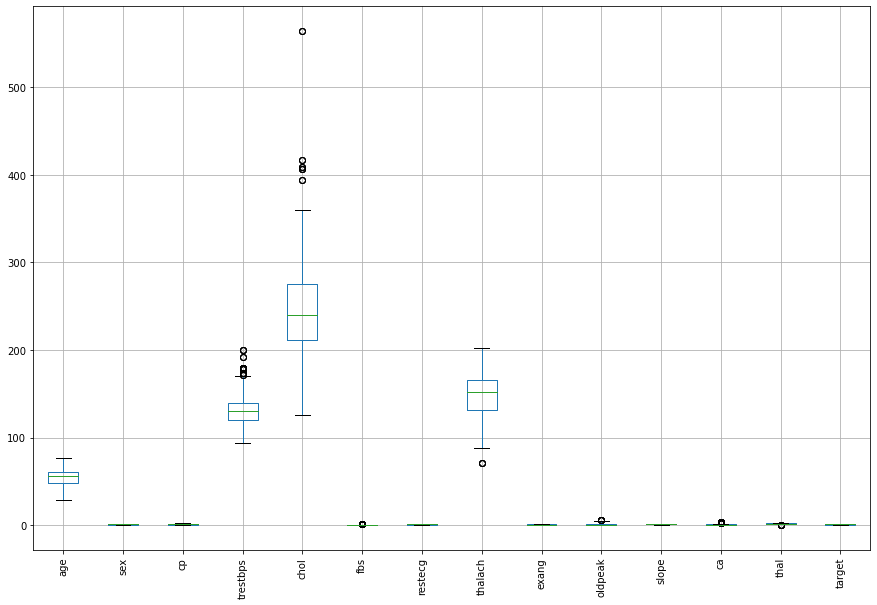

In [44]:
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

### Step 2: Data Cleaning and Preprocessing

#### Handle Outliers

In [45]:
for col in data.select_dtypes(include=['number']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Replacing high outliers with Q3
    data.loc[data[col] > upper, col] = Q3
    # Replacing low outliers with Q1
    data.loc[data[col] < lower, col] = Q1

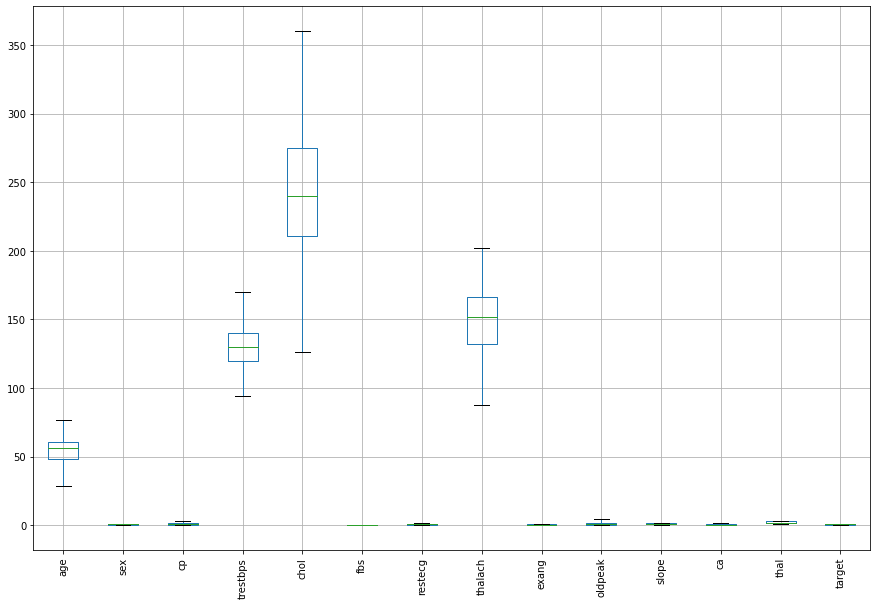

In [46]:
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [47]:
data.shape

(1025, 14)

#### Scale Numerical Features

Scale features such as resting blood pressure, serum cholesterol, maximum heart rate, and oldpeak using StandardScaler or MinMaxScaler.

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

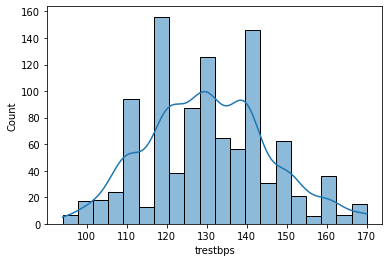

In [48]:
sns.histplot(data['trestbps'], kde=True)

<AxesSubplot:xlabel='chol', ylabel='Count'>

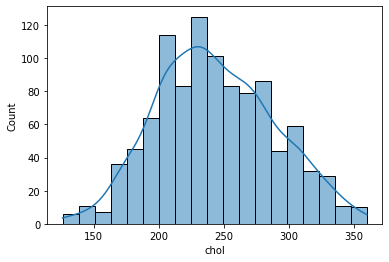

In [49]:
sns.histplot(data['chol'], kde=True)

<AxesSubplot:xlabel='thalach', ylabel='Count'>

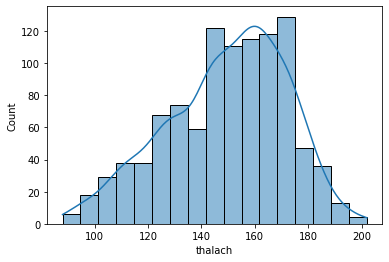

In [50]:
sns.histplot(data['thalach'], kde=True)

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

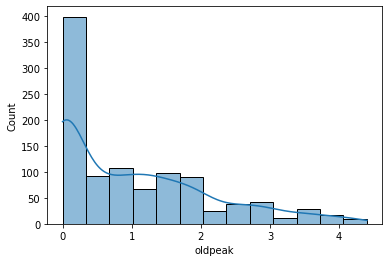

In [51]:
sns.histplot(data['oldpeak'], kde=True)

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
features_to_scale_min_max = ['trestbps', 'thalach']

In [54]:
scaler = MinMaxScaler()
data[features_to_scale_min_max] = scaler.fit_transform(data[features_to_scale_min_max])

In [55]:
features_to_scale_std = ['oldpeak']

In [56]:
scaler = StandardScaler()
data[features_to_scale_std] = scaler.fit_transform(data[features_to_scale_std])

In [57]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,0.407895,212,0,1,0.701754,0,-0.039574,2,2,3,0
1,53,1,0,0.605263,203,0,0,0.587719,1,1.857598,0,0,3,0
2,70,1,0,0.671053,174,0,1,0.324561,1,1.405890,0,0,3,0
3,61,1,0,0.710526,203,0,1,0.640351,0,-0.942989,2,1,3,0
4,62,0,0,0.578947,294,0,1,0.157895,0,0.773500,1,1,2,0


### Step 3: Train-Test Split

In [58]:
data_reg = data
data_cls = data

In [59]:
data_reg.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,0.407895,212,0,1,0.701754,0,-0.039574,2,2,3,0
1,53,1,0,0.605263,203,0,0,0.587719,1,1.857598,0,0,3,0
2,70,1,0,0.671053,174,0,1,0.324561,1,1.405890,0,0,3,0
3,61,1,0,0.710526,203,0,1,0.640351,0,-0.942989,2,1,3,0
4,62,0,0,0.578947,294,0,1,0.157895,0,0.773500,1,1,2,0


In [60]:
chol=["chol"]
scaler = MinMaxScaler()
data_cls[chol] = scaler.fit_transform(data_cls[chol])

In [61]:
data_cls.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,0.407895,0.367521,0,1,0.701754,0,-0.039574,2,2,3,0
1,53,1,0,0.605263,0.329060,0,0,0.587719,1,1.857598,0,0,3,0
2,70,1,0,0.671053,0.205128,0,1,0.324561,1,1.405890,0,0,3,0
3,61,1,0,0.710526,0.329060,0,1,0.640351,0,-0.942989,2,1,3,0
4,62,0,0,0.578947,0.717949,0,1,0.157895,0,0.773500,1,1,2,0


#### Regression

In [62]:
X1=data_reg.drop(columns=["chol","target"])
y1=data_reg["chol"]

In [63]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.25, random_state=42)

#### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
reg_lin = LinearRegression()
reg_lin.fit(X1_train, y1_train)
y1_pred = reg_lin.predict(X1_test)

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [67]:
mse_linreg = mean_squared_error(y1_test, y1_pred)
mae_linreg = mean_absolute_error(y1_test, y1_pred)
r2_linreg = r2_score(y1_test, y1_pred)
print("Linear Regression Mean Squared Error:", mse_linreg)
print("Linear Regression Mean Absolute Error:", mae_linreg)
print("Linear Regression R-squared:", r2_linreg)

Linear Regression Mean Squared Error: 0.036633265422092234
Linear Regression Mean Absolute Error: 0.15288768043062256
Linear Regression R-squared: 0.024094973284274235


#### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X1_train,y1_train)
y1_pred = dt_reg.predict(X1_test)

In [69]:
mse_dectree = mean_squared_error(y1_test, y1_pred)
mae_dectree = mean_absolute_error(y1_test, y1_pred)
r2_dectree = r2_score(y1_test, y1_pred)
print("Decision Tree Mean Squared Error:", mse_dectree)
print("Decision Tree Mean Absolute Error:", mae_dectree)
print("Decision Tree R-squared:", r2_dectree)

Decision Tree Mean Squared Error: 0.0011554620953004662
Decision Tree Mean Absolute Error: 0.006584854833882076
Decision Tree R-squared: 0.9692186526647122


#### Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X1_train,y1_train)

RandomForestRegressor()

In [71]:
y1_pred = rf_reg.predict(X1_test)

In [72]:
mse_RandFor = mean_squared_error(y1_test, y1_pred)
mae_RandFor = mean_absolute_error(y1_test, y1_pred)
r2_RandFor = r2_score(y1_test, y1_pred)
print("Random Forest Regressor Mean Squared Error:", mse_RandFor)
print("Random Forest Regressor Mean Absolute Error:", mae_RandFor)
print("Random Forest Regressor R-squared:", r2_RandFor)

Random Forest Regressor Mean Squared Error: 0.0021152448442656032
Random Forest Regressor Mean Absolute Error: 0.03231251454986865
Random Forest Regressor R-squared: 0.9436501755312146


#### Classification

In [73]:
X2=data_cls.drop(columns=["target"])
y2=data["target"]

In [74]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.25, random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression

#### Logistic Regression

In [76]:
reg_log = LogisticRegression()
reg_log.fit(X2_train, y2_train)
y2_pred = reg_log.predict(X2_test)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [78]:
accuracy_LogReg = accuracy_score(y2_test, y2_pred)
precision_LogReg = precision_score(y2_test, y2_pred)
recall_LogReg = recall_score(y2_test, y2_pred)
f1_LogReg = f1_score(y2_test, y2_pred)

print(f"Logistic Regression Accuracy: {accuracy_LogReg}")
print(f"Logistic Regression Precision: {precision_LogReg}")
print(f"Logistic Regression Recall: {recall_LogReg}")
print(f"Logistic Regression F1 Score: {f1_LogReg}")

Logistic Regression Accuracy: 0.8210116731517509
Logistic Regression Precision: 0.7724137931034483
Logistic Regression Recall: 0.896
Logistic Regression F1 Score: 0.8296296296296296


#### K-Nearest Neighbors (KNN)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train, y2_train)
y2_pred = knn.predict(X2_test)

In [81]:
accuracy_knn = accuracy_score(y2_test, y2_pred)
precision_knn = precision_score(y2_test, y2_pred)
recall_knn = recall_score(y2_test, y2_pred)
f1_knn = f1_score(y2_test, y2_pred)

print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Precision: {precision_knn}")
print(f"KNN Recall: {recall_knn}")
print(f"KNN F1 Score: {f1_knn}")

KNN Accuracy: 0.8365758754863813
KNN Precision: 0.8672566371681416
KNN Recall: 0.784
KNN F1 Score: 0.8235294117647058


#### Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
nb = GaussianNB()
nb.fit(X2_train, y2_train)
y2_pred = nb.predict(X2_test)

In [84]:
accuracy_nb = accuracy_score(y2_test, y2_pred)
precision_nb = precision_score(y2_test, y2_pred)
recall_nb = recall_score(y2_test, y2_pred)
f1_nb = f1_score(y2_test, y2_pred)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Precision: {precision_nb}")
print(f"Naive Bayes Recall: {recall_nb}")
print(f"Naive Bayes F1 Score: {f1_nb}")

Naive Bayes Accuracy: 0.8171206225680934
Naive Bayes Precision: 0.7746478873239436
Naive Bayes Recall: 0.88
Naive Bayes F1 Score: 0.8239700374531835
